In [72]:
### Desa Bolger and Emma Beyer
### Add more info here, email address etc.

#The goal of this document is to process the data into something that will be workable. 


#Read in the packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'contextily'

In [58]:
#read in file that has wrecks+obstructions with bathymetry data in NC EEZ (from ArcGIS model1)
NCwreckObstruction = gpd.read_file('../Data/Processed/NCeezWrecksDepth.shp')
NCwreckObstruction.head()

#read in NC state file
NCStateFile = gpd.read_file('../Data/Raw/NCcounty.shp')
NCStateFile.head()

,FIPS,CountyName,UpperCount,SapCountyI,DOTDistric,DOTDivisio,SAP_CNTY_N,CNTY_NBR,DSTRCT_NBR,DIV_NBR,NAME,SHPNumber,WATER,Shape_Leng,Shape_Area,geometry
0,0,None,None,None,0,0,0,0,0,0,None,0,O,3.643978e+06,1.908241e+11,"MULTIPOLYGON (((-76.91598 36.54389, -76.91625 ..."
1,1,Alamance,ALAMANCE,001,1,7,1,0,1,7,Alamance,1,A,4.766908e+05,1.210719e+10,"POLYGON ((-79.25796 36.24345, -79.25801 36.239..."
2,3,Alexander,ALEXANDER,002,2,12,2,1,2,12,Alexander,2,A,3.873423e+05,7.343464e+09,"POLYGON ((-81.10951 35.7766, -81.10973 35.7768..."
3,5,Alleghany,ALLEGHANY,003,1,11,3,2,1,11,Alleghany,3,A,4.391667e+05,6.576362e+09,"POLYGON ((-80.90164 36.56177, -80.9019 36.5615..."
4,7,Anson,ANSON,004,3,10,4,3,3,10,Anson,4,A,5.755038e+05,1.497020e+10,"POLYGON ((-80.07537 35.14309, -80.07543 35.142..."


In [56]:
#make it just wrecks, not obstructions
NCwreck = NCwreckObstruction[NCwreckObstruction['objectcate'] == 'wreck']
NCwreck.to_file("../Data/Processed/ONLYncWRECKS.shp")

NCwreck.shape #3464, 59

C:\Users\dkb33\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 111655654.045000002 of field Shape_Le_1 of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\dkb33\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 4352814024570 of field Shape__Are of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\dkb33\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 111655654.045000002 of field Shape__Len of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\dkb33\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 111655654.045000002 of field Shape_Le_1 of feature 1 not successfully written. Possibly due to too larger number with respect to

C:\Users\dkb33\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 21531093070000 of field Shape__Are of feature 1926 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\dkb33\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 364974501.287999988 of field Shape_Le_1 of feature 1927 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\dkb33\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 6383595139050 of field Shape__Are of feature 1927 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\dkb33\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 364974501.287999988 of field Shape__Len of feature 1927 not successfully written. Possibly due to too larger number with res

(3464, 59)

In [23]:
NCwreckObstruction.shape #7153, 59 obstructions and wrecks

(7153, 59)

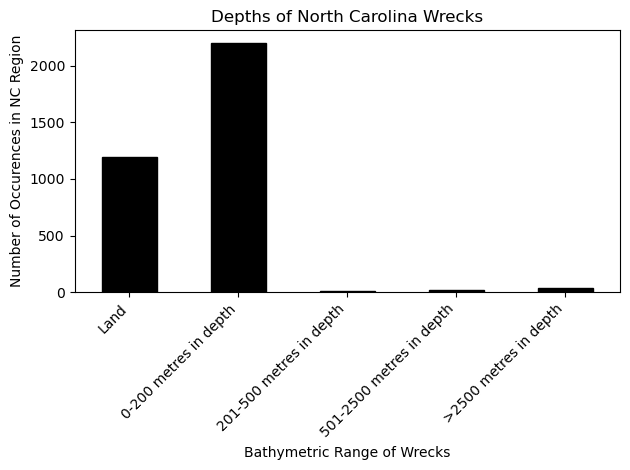

In [53]:
#visualize depth graphically

#make an order by depth
custom_order = ['Land', '0-200 metres in depth', '201-500 metres in depth', '501-2500 metres in depth', '>2500 metres in depth']

#apply order to "Range" column
NCwreck['RANGE'] = pd.Categorical(NCwreck['RANGE'], categories=custom_order, ordered=True)

#count range by size
range_counts = NCwreck.groupby('RANGE').size()

#plot
range_counts.plot(kind='bar', color='black', edgecolor='black')

#add labels
plt.xlabel('Bathymetric Range of Wrecks')
plt.xticks(rotation=45, ha = "right", va = 'top')
plt.ylabel('Number of Occurences in NC Region')
plt.title('Depths of North Carolina Wrecks')
plt.tight_layout()
plt.savefig('../Products/NC_Wrecks_Depths.png', dpi=300)
plt.show()


<AxesSubplot: >

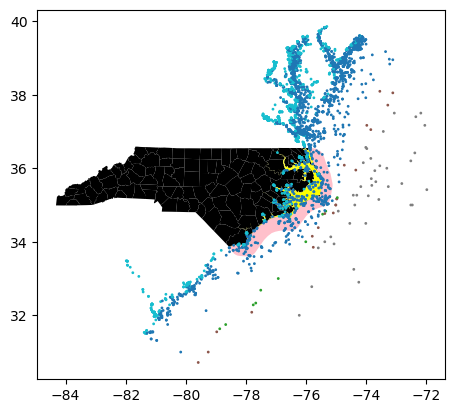

In [76]:
water_type_LAND = NCStateFile[NCStateFile['WATER'] == 'A']
ax = water_type_LAND.plot(color = "black")

water_type_O = NCStateFile[NCStateFile['WATER'] == 'O'] #not sure what that is
water_type_O.plot(ax = ax, color = "pink")

water_type_S = NCStateFile[NCStateFile['WATER'] == 'S']
water_type_S.plot(ax = ax, color = 'yellow')

NCwreck.plot(ax = ax, figsize=(12, 8), column = "RANGE", markersize = 1)


